# Ferrario Gabriele 817518 Assignment 4
___


In [1]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

import os
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Data/'

Mounted at /content/gdrive


**Data Loading and Preparation**

In [3]:
def image_preprocessing(target,directory):
    list_img = np.empty((0, 224, 224, 3))
    list_target = np.array([])
    path = directory+"/"+target
    for filename in os.listdir(path):

        img = image.load_img(os.path.join(path, filename), target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        list_img = np.append(list_img, x, axis=0)

        list_target = np.append(list_target, target)
    
    return list_img, list_target

In [4]:
def image_for_training():
  directory = base_dir+"./train"
  list_img1, list_target1 = image_preprocessing("cars", directory)
  list_img2, list_target2 = image_preprocessing("planes", directory)
  img_finale =np.append(list_img1, list_img2, axis=0)
  print("shape image for training: ", img_finale.shape)
  target_finale=np.append(list_target1, list_target2)
  print("shape targets:", target_finale.shape)

  return img_finale, target_finale

**Model definition**

In [5]:
model = VGG16(weights='imagenet') 

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Taglio nel block3_pool**

In [7]:
first_model = Model(inputs=model.input, outputs=model.get_layer('block3_pool').output)
first_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
immagini_definitive_training, target = image_for_training()
print(immagini_definitive_training.shape)
features = first_model.predict(immagini_definitive_training)

print(features.shape)

shape image for training:  (400, 224, 224, 3)
shape targets: (400,)
(400, 224, 224, 3)
(400, 28, 28, 256)


In [9]:
features.shape

(400, 28, 28, 256)

In [10]:
nsamples, nx, ny, nz = features.shape
features_2d = features.reshape((nsamples,nx*ny*nz))
features_2d.shape

(400, 200704)

Train

In [11]:
svm_1 = svm.SVC(kernel='linear', C=0.001).fit(features_2d, target)

In [12]:
pred = svm_1.predict(features_2d)

acc1_training_svm=accuracy_score(target, pred)
acc1_training_svm

1.0

In [13]:
lr_1 = LogisticRegression(C=0.001).fit(features_2d, target)

In [14]:
pred = lr_1.predict(features_2d)

acc1_training_lr=accuracy_score(target, pred)
acc1_training_lr

1.0

Test

In [15]:
def image_for_test():
  directory = base_dir+"./test"
  list_img1, list_target1 = image_preprocessing("cars", directory)
  list_img2, list_target2 = image_preprocessing("planes", directory)
  img_finale =np.append(list_img1, list_img2, axis=0)
  target_true=np.append(list_target1, list_target2)

  return img_finale, target_true

In [16]:
immagini_definitive_test, target_true = image_for_test()
features_test = first_model.predict(immagini_definitive_test)

features_test.shape

(100, 28, 28, 256)

In [17]:
nsamples, nx, ny, nz = features_test.shape
features_test_2d = features_test.reshape((nsamples,nx*ny*nz))
features_test_2d.shape

(100, 200704)

In [18]:
pred = svm_1.predict(features_test_2d)

In [19]:
pred

array(['planes', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars',
       'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars',
       'cars', 'cars', 'planes', 'cars', 'planes', 'cars', 'cars', 'cars',
       'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars',
       'planes', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars',
       'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars', 'cars',
       'cars', 'cars', 'planes', 'cars', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes', 'planes', 'planes', 'planes', 'planes',
       'planes', 'planes',

In [20]:
acc1_test_svm=accuracy_score(target_true, pred)
acc1_test_svm

0.95

In [21]:
pred = lr_1.predict(features_test_2d)

acc1_test_lr=accuracy_score(target_true, pred)
acc1_test_lr

0.92

**Taglio in block5_pool**

In [22]:
second_model = VGG16(weights='imagenet', include_top=False) 

In [23]:
second_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [24]:
features = second_model.predict(immagini_definitive_training)

print(features.shape)

(400, 7, 7, 512)


In [25]:
nsamples, nx, ny, nz = features.shape
features_2d = features.reshape((nsamples,nx*ny*nz))
features_2d.shape

(400, 25088)

Train

In [26]:
svm_2 = svm.SVC(kernel='linear', C=0.001).fit(features_2d, target)

In [27]:
pred_training = svm_2.predict(features_2d)

acc2_training_svm=accuracy_score(target, pred_training)
acc2_training_svm

1.0

In [28]:
lr_2 = LogisticRegression(C=0.001).fit(features_2d, target)
pred = lr_2.predict(features_2d)

acc2_training_lr=accuracy_score(target, pred)
acc2_training_lr

1.0

Test

In [29]:
features_test = second_model.predict(immagini_definitive_test)

features_test.shape

(100, 7, 7, 512)

In [30]:
nsamples, nx, ny, nz = features_test.shape
features_test_2d = features_test.reshape((nsamples,nx*ny*nz))
features_test_2d.shape

(100, 25088)

In [31]:
pred = svm_2.predict(features_test_2d)

In [32]:
acc2_test_svm=accuracy_score(target_true, pred)
acc2_test_svm

0.99

In [33]:
pred = lr_2.predict(features_test_2d)

acc2_test_lr=accuracy_score(target_true, pred)
acc2_test_lr

0.98

**Taglio nel FC1**

In [34]:
model = VGG16(weights='imagenet') 

In [35]:
third_model = Model(inputs=model.input, outputs=model.get_layer('fc1').output)
third_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [36]:
features = third_model.predict(immagini_definitive_training)

print(features.shape)

(400, 4096)


Train

In [37]:
svm_3 = svm.SVC(kernel='linear', C=0.001).fit(features, target)

In [38]:
pred = svm_3.predict(features)

acc3_training_svm=accuracy_score(target, pred)
acc3_training_svm

1.0

In [39]:
lr_3 = LogisticRegression(C=0.001).fit(features, target)
pred = lr_3.predict(features)

acc3_training_lr=accuracy_score(target, pred)
acc3_training_lr

1.0

Test

In [40]:
features_test = third_model.predict(immagini_definitive_test)

features_test.shape

(100, 4096)

In [41]:
pred = svm_3.predict(features_test)

In [42]:
acc3_test_svm=accuracy_score(target_true, pred)
acc3_test_svm

1.0

In [43]:
pred = lr_3.predict(features_test)

acc3_test_lr=accuracy_score(target_true, pred)
acc3_test_lr

1.0

Plot

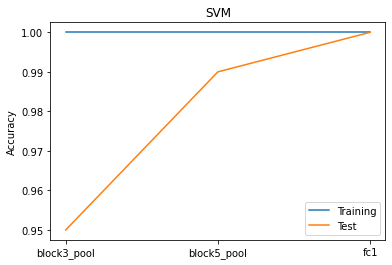

In [50]:
from matplotlib import pyplot as plt

ris_training=[acc1_training_svm, acc2_training_svm, acc3_training_svm]
ris_test=[acc1_test_svm, acc2_test_svm, acc3_test_svm]
x=["block3_pool","block5_pool","fc1"]
plt.plot(x,ris_training, label='Training')
plt.plot(x,ris_test, label='Test')
plt.title("SVM")
plt.ylabel('Accuracy') 

plt.legend()

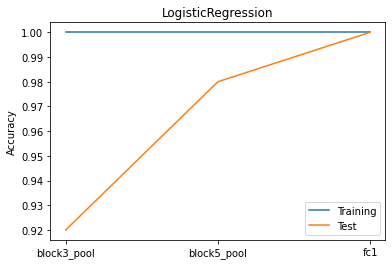

In [51]:
ris_training=[acc1_training_lr, acc2_training_lr, acc3_training_lr]
ris_test=[acc1_test_lr, acc2_test_lr, acc3_test_lr]

plt.plot(x,ris_training, label='Training')
plt.plot(x,ris_test, label='Test')
plt.title("LogisticRegression")
plt.ylabel('Accuracy') 

plt.legend()